<a href="https://colab.research.google.com/github/silvaelaine/propensity_model/blob/main/propensity_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de propensão - Marketing bancário

O modelo de propensão é o modelo que tenta prever o cliente que tem intenção ou probabilidade de comprar aquele produto específico. Os produtos variam de fundo de investimento, produto de seguro, empréstimo, etc.

Insights e previsões do comportamento do cliente são os principais benefícios de um modelo de propensão para as empresas.

A análise ajuda a selecionar o cliente-alvo com alto potencial para adquirir o produto, para que a equipe de vendas possa despender tempo e esforço para convencer as pessoas interessadas. Além disso, o modelo pode ser atualizado do modelo de propensão para um modelo de elevação (uplifting modeling) se você precisar de um cliente-alvo mais eficaz.

## Sobre o dataset
Os dados estão relacionados com campanhas de marketing direto de uma instituição bancária portuguesa. As campanhas de marketing foram baseadas em ligações telefônicas. Muitas vezes era necessário mais do que um contato com o mesmo cliente, para saber se o produto (depósito a prazo bancário) seria ('sim') ou ('não').

[Dataset original do repositório de Machine Learning UC Irvine](https://archive.ics.uci.edu/dataset/222/bank+marketing)

## Objetivo

O objetivo é usar um algoritmo de classificação para prever se o cliente irá subscrever (sim/não) um depósito a prazo (variável target y).

### Dicionário de variáveis

`age`: idade dos clientes

`job`: tipo de trabalho (categórico: 'administrador','operário','empreendedor','empregada doméstica','gestão','aposentado','autônomo','serviços','estudante','técnico' ,'desempregado','desconhecido')

`marital`: estado civil (categórico: 'divorciado', 'casado', 'solteiro', 'desconhecido'; nota: 'divorciado' significa divorciado ou viúvo)

`education`: (categórico: 'básico.4a','básico.6a','básico.9a','ensino médio','analfabeto','curso.profissional','grau universitário','desconhecido')

`default`: tem crédito inadimplente? (sim/não)

`housing`: tem empréstimo hipotecário/hipoteca? (sim/não)

`loan`: tem empréstimo pessoal? (sim/não)

`contact`: tipo de comunicação de contato (categórico: 'celular', 'telefone')

`month`: último mês de contato do ano (categórico: 'jan', 'fev', 'mar', ..., 'nov', 'dez')

`day_of_week`: último dia de contato da semana

`duration`: duração do último contato, em segundos (numérico).

`campaign`: número de contatos realizados durante esta campanha e para este cliente (numérico)

`pdays`: número de dias que se passaram desde que o cliente foi contatado pela última vez em uma campanha anterior (numérico; -1 significa que o cliente não foi contatado anteriormente)

`previous`: número de contatos realizados antes desta campanha e para este cliente

`poutcome`: resultado da campanha de marketing anterior (categórica: 'fracasso', 'inexistente', 'sucesso')

`emp.var.rate`:

`cons.price.idx`:

`cons.conf.idx`:

`euribor3m`:

`nr.employed`:

`y`: o cliente subscreveu um depósito a prazo? (binário: "sim", "não")

### Importando bibliotecas

In [66]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from collections import Counter
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, accuracy_score, confusion_matrix, classification_report, fbeta_score, f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

from sklearn.model_selection import GridSearchCV



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, RandomOverSampler
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 30)

### Analisando os dados

In [11]:
df = pd.read_csv('bank-additional-full.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [13]:
print(f"Linhas: {df.shape[0]}.")
print(f"Colunas: {df.shape[1]}.")

Linhas: 41188.
Colunas: 21.


In [14]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [16]:
# Dados categóricos
dados_cat = df.select_dtypes(include=['object']).columns
dados_cat

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [17]:
# Dados numéricos
dados_num = df.select_dtypes(exclude=['object']).columns
dados_num

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [18]:
# Número de valores únicos em cada coluna em ordem crescente
df.nunique().sort_values()

y               2
contact         2
default         3
housing         3
loan            3
             ... 
pdays          27
campaign       42
age            78
euribor3m     316
duration     1544
Length: 21, dtype: int64

In [19]:
#Verificando se há dados faltantes
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
                 ..
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
Length: 21, dtype: int64

In [20]:
# Checando existência de dados duplicados
dados_duplicados = df.duplicated(keep=False)
dados_duplicados.value_counts()

False    41164
True        24
dtype: int64

In [21]:
df[dados_duplicados]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
36950,45,admin.,married,university.degree,no,no,no,cellular,jul,thu,252,1,999,0,nonexistent,-2.9,92.469,-33.6,1.072,5076.2,yes
36951,45,admin.,married,university.degree,no,no,no,cellular,jul,thu,252,1,999,0,nonexistent,-2.9,92.469,-33.6,1.072,5076.2,yes
38255,71,retired,single,university.degree,no,no,no,telephone,oct,tue,120,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,no


Vamos remover só um de cada par para deletar:

In [22]:
df.drop_duplicates(keep='first', inplace=True)

In [23]:
# Nova dimensão do dataset
df.shape

(41176, 21)

### Analisando variáveis numéricas

Checando resumo estatístico:

In [24]:
df[dados_num].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


* O dataset contém clientes de 17 até 98 `anos` (age).
* 75% dos clientes tem 47 anos ou menos.
* O número de contatos realizados com o cliente durante a `campanha` (campaign) vai de 1 até 56. 75% recebeu 3 ligações ou menos.
* 75% dos clientes tiveram ligações de 319 `segundos` (duration) ou menos. O máximo de segundos foi de 4918.

Já que 75% dos clientes tem 47 anos ou menos, vamos verificar clientes com mais de 50 anos:

In [25]:
df.query(f"age >= 50")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,293,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,483,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,151,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


 Já que 75% dos clientes recebeu 3 ligações ou menos, vamos verificar que recebeu mais que isso:

In [26]:
df.query(f"campaign > 3")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
278,47,technician,single,basic.9y,no,no,no,telephone,may,mon,10,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
299,38,unknown,married,unknown,unknown,no,no,telephone,may,mon,362,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
325,40,housemaid,single,professional.course,no,no,no,telephone,may,mon,111,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
332,35,management,married,high.school,no,yes,no,telephone,may,mon,174,5,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
333,50,self-employed,single,university.degree,no,no,yes,telephone,may,mon,88,5,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41152,26,management,single,university.degree,no,yes,no,cellular,nov,mon,112,5,999,0,nonexistent,-1.1,94.767,-50.8,1.039,4963.6,no
41155,31,housemaid,single,university.degree,no,no,no,telephone,nov,mon,152,5,999,0,nonexistent,-1.1,94.767,-50.8,1.039,4963.6,no
41157,31,housemaid,single,university.degree,no,no,no,cellular,nov,mon,159,4,999,0,nonexistent,-1.1,94.767,-50.8,1.039,4963.6,no
41169,62,services,married,high.school,no,yes,no,cellular,nov,wed,154,5,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no


O máximo de ligações recebidas é 56, vamos verificar quem recebeu esse tanto de ligações durante a campanha:

In [27]:
df.query(f"campaign == 56")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4107,32,admin.,married,university.degree,unknown,unknown,unknown,telephone,may,mon,261,56,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no


O máximo de segundos (duration) de uma ligação foi de 4918, vamos descobrir quem foi:

In [28]:
df.query(f"duration == 4918")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24091,33,technician,single,professional.course,no,yes,no,telephone,nov,mon,4918,1,999,0,nonexistent,-0.1,93.2,-42.0,4.406,5195.8,no


### Histogramas

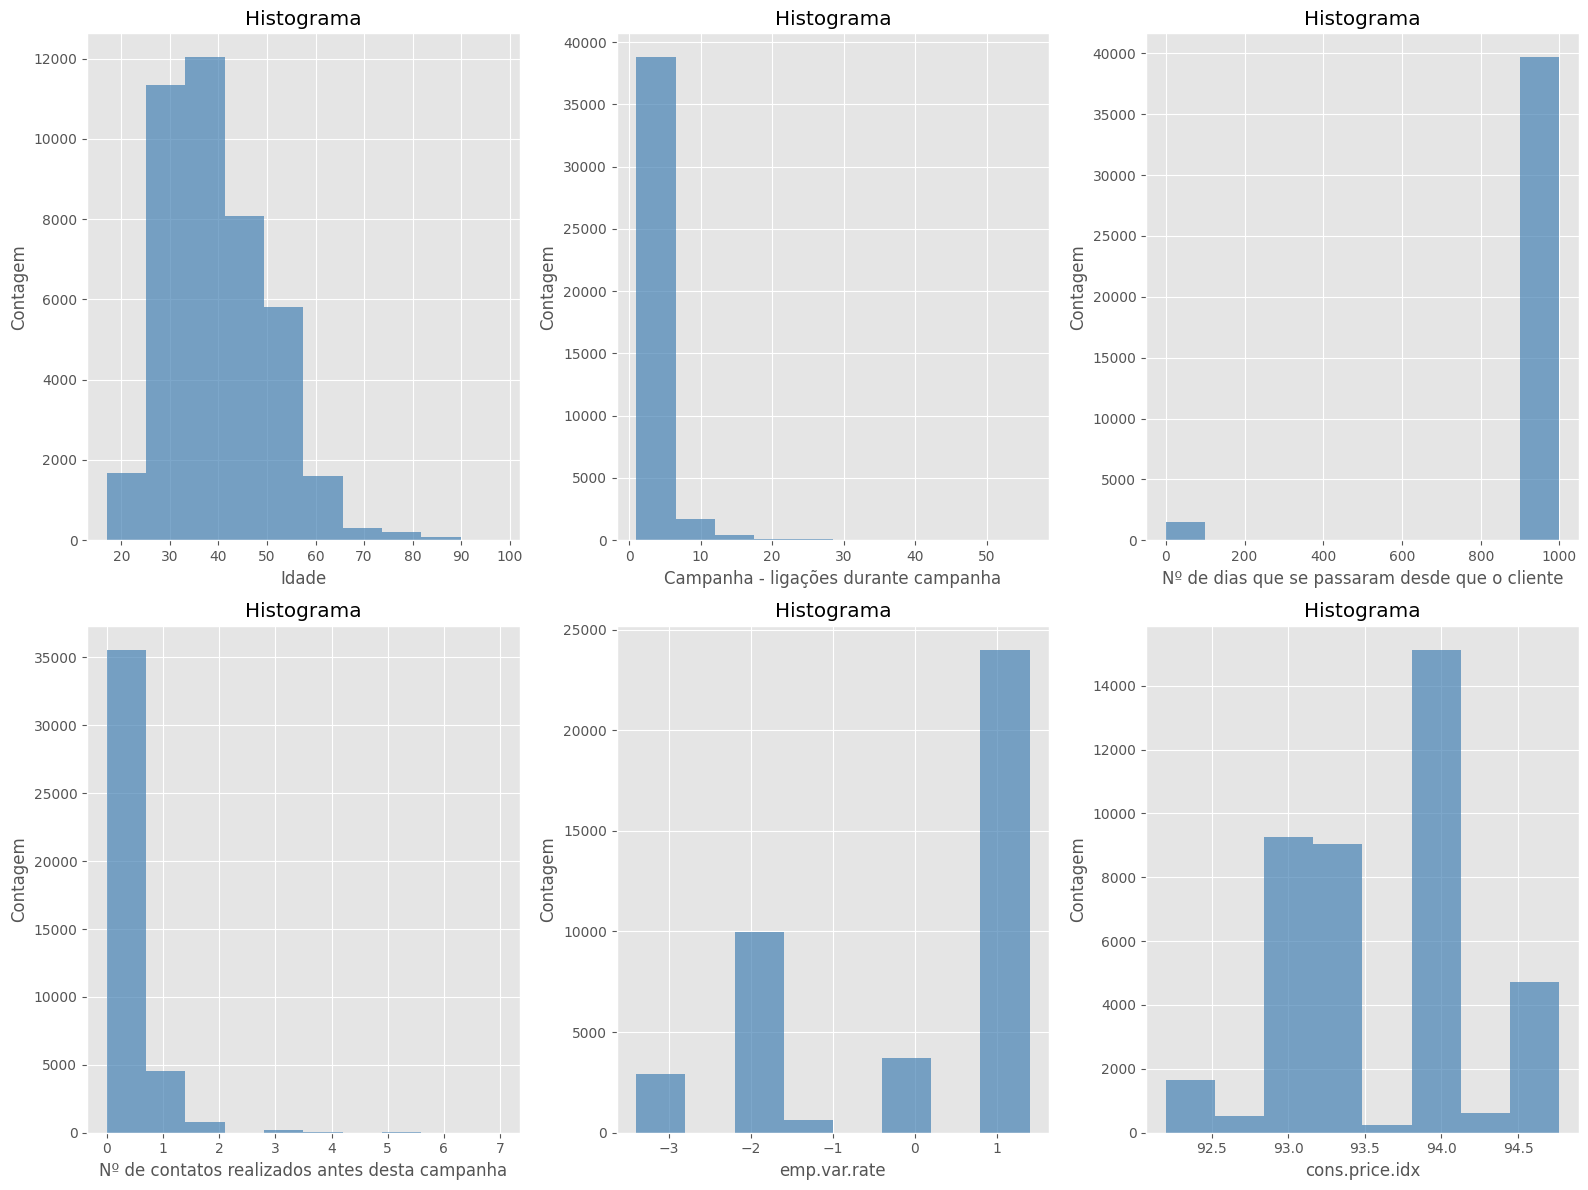

In [29]:
# 'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
fig, axes = plt.subplots(2, 3, figsize=(16, 12))

axes[0, 0].hist(df.age, color='steelblue', alpha=0.7)
axes[0, 0].set_xlabel('Idade')
axes[0, 0].set_ylabel('Contagem')
axes[0, 0].set_title(r'Histograma')

axes[0, 1].hist(df.campaign, color='steelblue', alpha=0.7)
axes[0, 1].set_xlabel('Campanha - ligações durante campanha')
axes[0, 1].set_ylabel('Contagem')
axes[0, 1].set_title(r'Histograma')

axes[0, 2].hist(df.pdays, color='steelblue', alpha=0.7)
axes[0, 2].set_xlabel('Nº de dias que se passaram desde que o cliente')
axes[0, 2].set_ylabel('Contagem')
axes[0, 2].set_title(r'Histograma')

axes[1, 0].hist(df.previous, color='steelblue', alpha=0.7)
axes[1, 0].set_xlabel('Nº de contatos realizados antes desta campanha')
axes[1, 0].set_ylabel('Contagem')
axes[1, 0].set_title(r'Histograma')

axes[1, 1].hist(df['emp.var.rate'], bins = 8, color='steelblue', alpha=0.7)
axes[1, 1].set_xlabel('emp.var.rate')
axes[1, 1].set_ylabel('Contagem')
axes[1, 1].set_title(r'Histograma')

axes[1, 2].hist(df['cons.price.idx'], bins = 8, color='steelblue', alpha=0.7)
axes[1, 2].set_xlabel('cons.price.idx')
axes[1, 2].set_ylabel('Contagem')
axes[1, 2].set_title(r'Histograma')


fig.tight_layout()
plt.show()

### Analisando variáveis categóricas

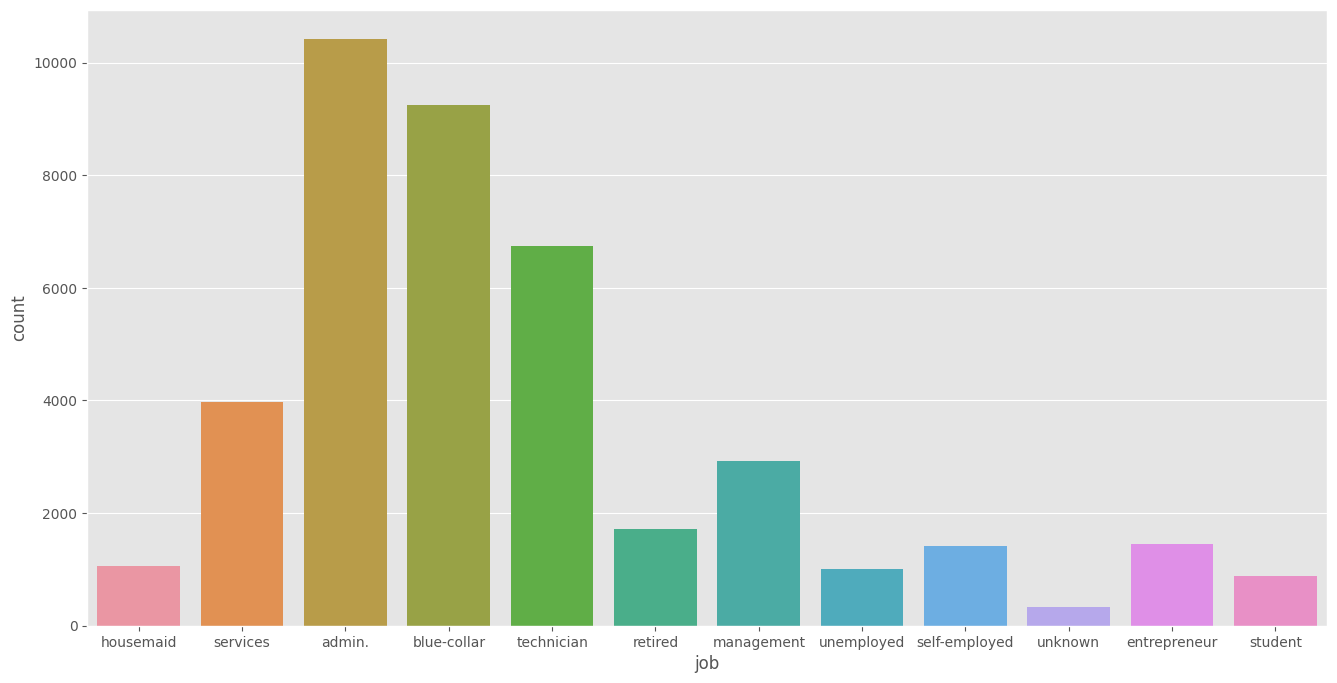

In [30]:
fig, ax = plt.subplots(figsize=(16, 8))
_ = sns.countplot(data=df, x='job', ax=ax)

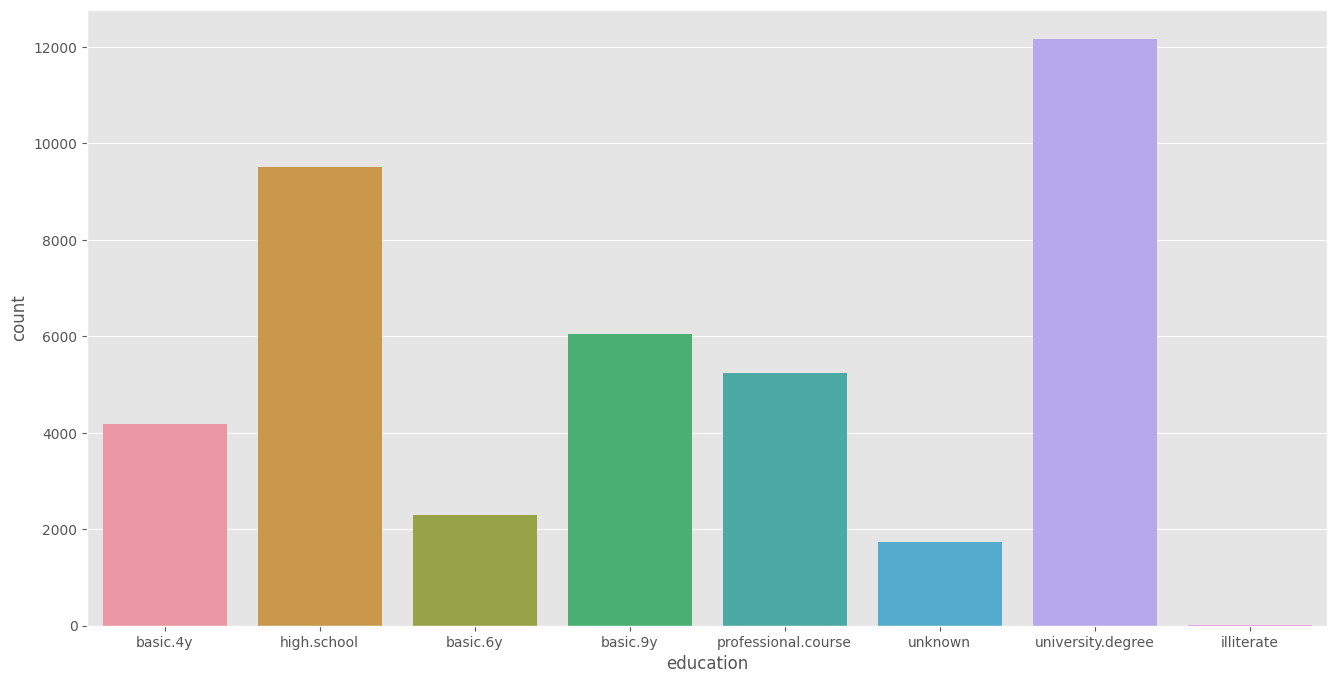

In [31]:
fig, ax = plt.subplots(figsize=(16, 8))
_ = sns.countplot(data=df, x='education', ax=ax)

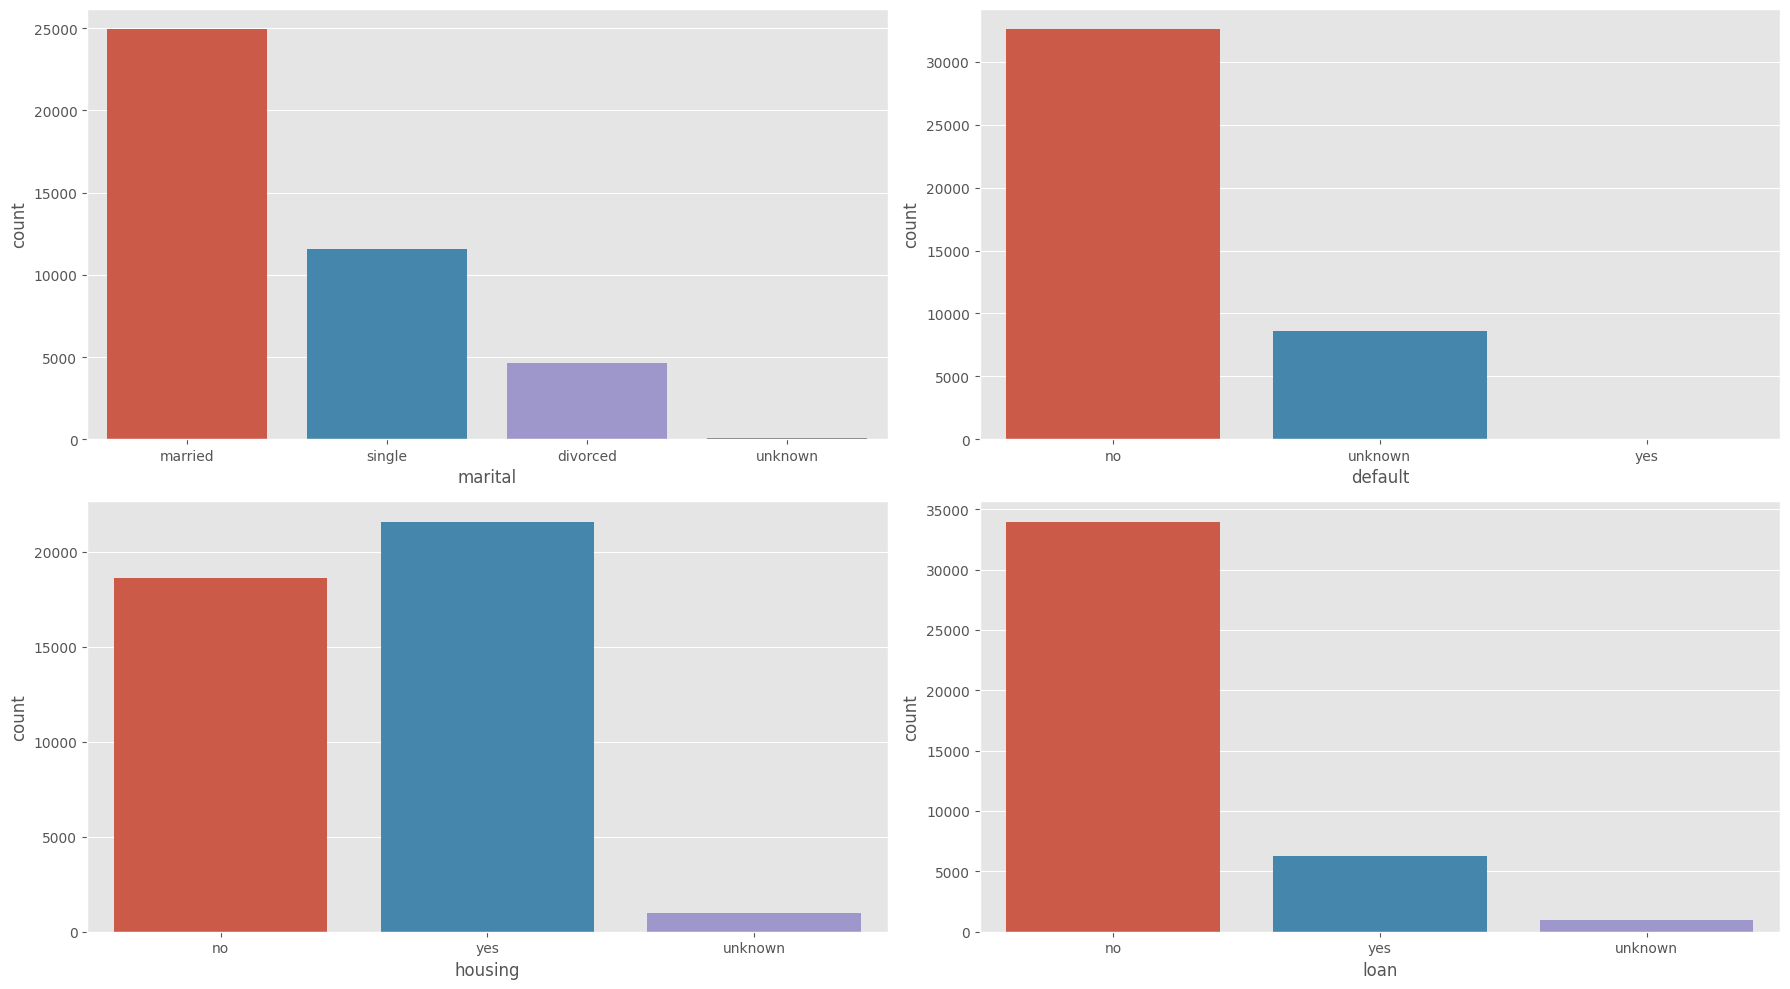

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
_ = sns.countplot(data=df, x='marital', ax=axes[0][0])
_ = sns.countplot(data=df, x='default', ax=axes[0][1])
_ = sns.countplot(data=df, x='housing', ax=axes[1][0])
_ = sns.countplot(data=df, x='loan', ax=axes[1][1])

_ = plt.tight_layout()

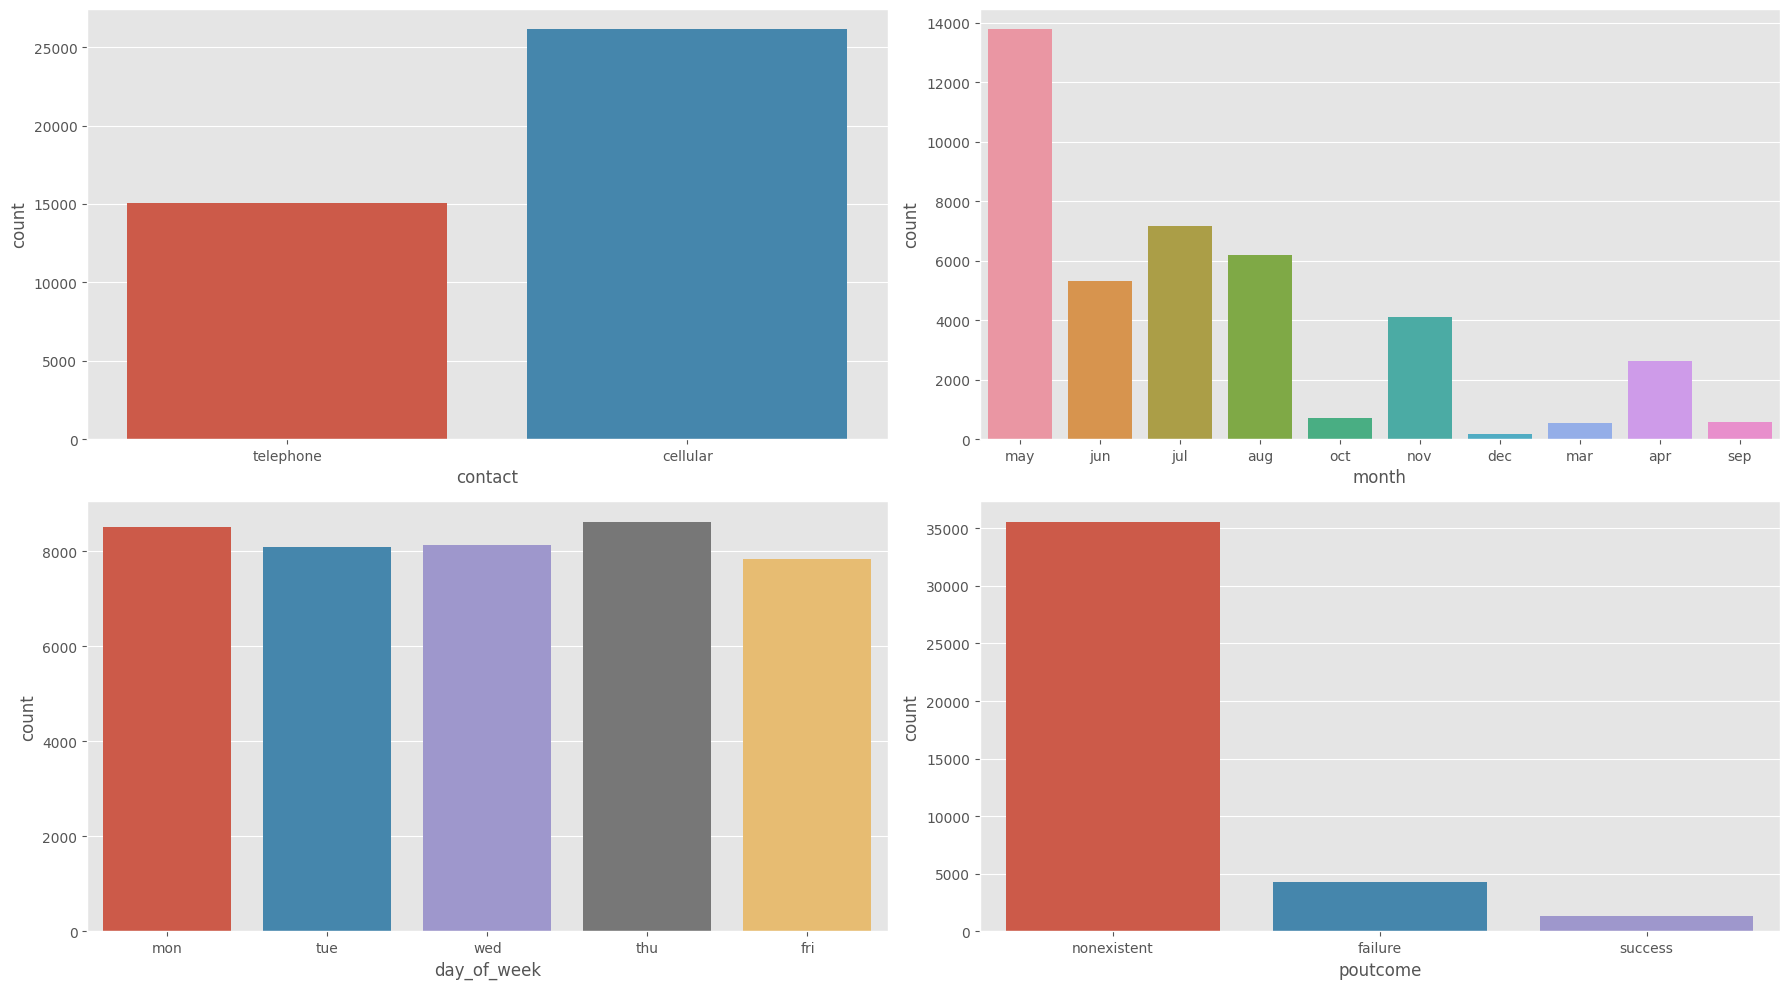

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
_ = sns.countplot(data=df, x='contact', ax=axes[0][0])
_ = sns.countplot(data=df, x='month', ax=axes[0][1])
_ = sns.countplot(data=df, x='day_of_week', ax=axes[1][0])
_ = sns.countplot(data=df, x='poutcome', ax=axes[1][1])

_ = plt.tight_layout()

### Analisando a variável target

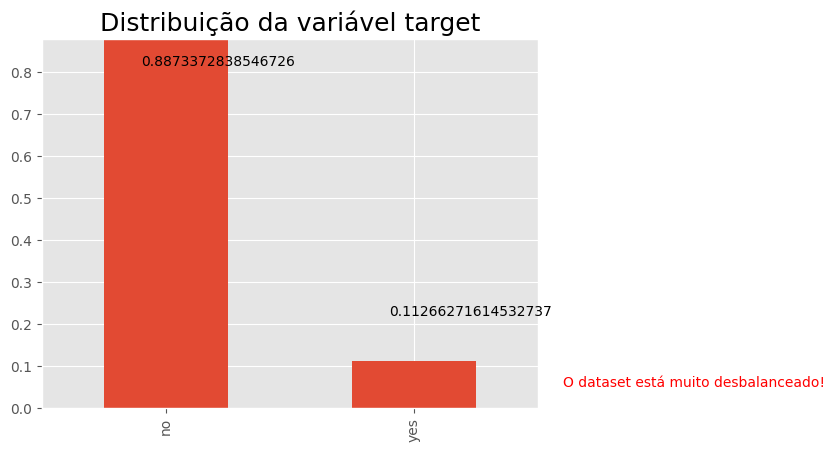

In [34]:
_ = df.y.value_counts(1).plot.bar()
_ = plt.title('Distribuição da variável target', size = 18)
_ = plt.text(-0.1, 0.815, df.y.value_counts(1)[0])
_ = plt.text(0.9, 0.22, df.y.value_counts(1)[1])
_ = plt.ylim(0, 0.88)
_ = plt.text(1.6, 0.05, "O dataset está muito desbalanceado!", color='r')

In [98]:
df.y.value_counts()

no     36537
yes     4639
Name: y, dtype: int64

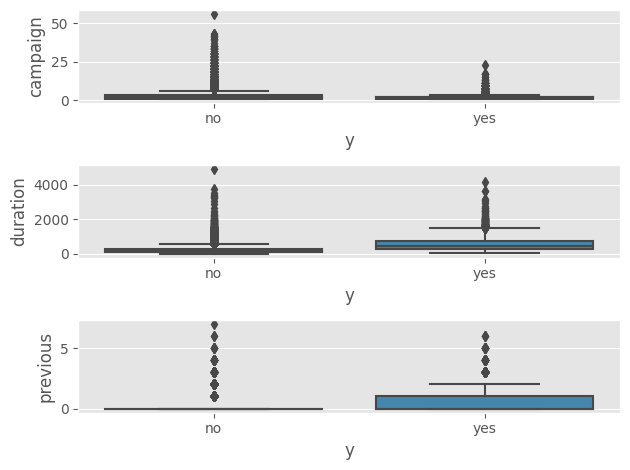

In [35]:
# Número de ligações para os clientes durante a campanha VS cliente subscreveu um depósito
fig, axes = plt.subplots(3, 1)

_ = sns.boxplot(data=df, x='y', y='campaign', ax=axes[0])
_ = sns.boxplot(data=df, x='y', y='duration', ax=axes[1])
_ = sns.boxplot(data=df, x='y', y='previous', ax=axes[2])
fig.tight_layout()

Podemos ver que os **clientes que não subscreveram** um depósito a prazo receberam **mais ligações** durante a campanha, a diferença parece ser significante. Já para a **duração de chamadas**, **os clientes que não subscreveram possuem ligações com mais duração**, apesar da diferença não parecer ser significante. Para a variável **previous**, temos clientes que foram contatados na campanha anterior. **A análise do boxplot sugere que as pessoas que subscreveram um depósito foram contatadas durante a campanha anterior.**

A fonte dos nossos dados afirma que: a variável `duration` afeta altamente o destino de saída (por exemplo, se duração=0 então y='não'). No entanto, a duração não é conhecida antes de uma chamada ser realizada. Além disso, após o término da chamada, y é obviamente conhecido. Assim, este input só deve ser incluído para fins de benchmark e deve ser descartado se a intenção for ter um modelo preditivo realista.

Portanto, vamos excluir essa variável do dataset.

In [36]:
new_df = df.drop(labels="duration", axis=1)

In [37]:
# Agora temos 20 colunas.
new_df.shape

(41176, 20)

### Correlação

In [38]:
# Transformando variável categórica binária:
new_df['y'] = new_df['y'].map({'no': 0, 'yes': 1})

In [39]:
# Verificando correlação entre as variáveis
new_df.corr().style.background_gradient(cmap='viridis')

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607,0.030381
campaign,0.004622,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129,-0.066361
pdays,-0.034381,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659,-0.324948
previous,0.024379,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411,0.230202
emp.var.rate,-0.000242,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949,-0.298289
cons.price.idx,0.001009,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945,-0.136134
cons.conf.idx,0.129075,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679,0.054802
euribor3m,0.010852,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146,-0.307740
nr.employed,-0.017607,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000,-0.354669
y,0.030381,-0.066361,-0.324948,0.230202,-0.298289,-0.136134,0.054802,-0.307740,-0.354669,1.000000


As features e a variável target parecem não possuir nenhuma correlação. Mas, há multicolinearidade, algumas features possuem correlação linear entre si.

## Pré-processamento + feature engineering:

Para treinarmos o algoritmo precisamos transformar os dados categóricos em numéricos.

In [40]:
dados_cat_new = new_df.select_dtypes(include=['object']).columns

In [41]:
# Valores únicos das colunas categóricas e com isso verificando cardinalidade.

new_df[dados_cat_new].nunique().sort_values()

contact         2
default         3
housing         3
loan            3
poutcome        3
marital         4
day_of_week     5
education       8
month          10
job            12
dtype: int64

Normalmente, **one hot encoding requer** a criação de uma nova coluna para cada elemento, que indica (com um booleano) se o elemento está ou não presente naquela instância. Esta é uma etapa necessária e popular porque os algoritmos de aprendizado de máquina entendem apenas números.

Mas nesse caso há um problema: a **cardinalidade** (número de categorias únicas). A alta cardinalidade faz com que largura do conjunto de dados (ou dimensionalidade) aumenta significativamente. À medida que a dimensionalidade aumenta, o número de combinações possíveis de parâmetros para algoritmos de aprendizado de máquina pesquisar explode exponencialmente. Este problema é chamado de **maldição da dimensionalidade (ou cardinalidade)**.

**Frequency Encoding**

In [42]:
# Frequência da variável education
frq_education = (df.groupby('education').size()) / len(df)
frq_education

education
basic.4y               0.101418
basic.6y               0.055639
basic.9y               0.146809
high.school            0.231008
illiterate             0.000437
professional.course    0.127259
university.degree      0.295415
unknown                0.042015
dtype: float64

In [43]:
# Frequência da variável month
frq_month = (df.groupby('month').size()) / len(df)
frq_month

month
apr    0.063896
aug    0.149990
dec    0.004420
jul    0.174106
jun    0.129153
mar    0.013260
may    0.334345
nov    0.099573
oct    0.017413
sep    0.013843
dtype: float64

In [44]:
# Frequência da variável job
frq_job = (df.groupby('job').size()) / len(df)
frq_job

job
admin.           0.253036
blue-collar      0.224718
entrepreneur     0.035360
housemaid        0.025743
management       0.071012
retired          0.041723
self-employed    0.034510
services         0.096343
student          0.021250
technician       0.163663
unemployed       0.024626
unknown          0.008014
dtype: float64

In [45]:
# Codificando as variáveis por sua frequência
new_df['education_encode'] = new_df['education'].apply(lambda x : frq_education[x])
new_df['month_encode'] = df['month'].apply(lambda x : frq_month[x])
new_df['job_encode'] = df['job'].apply(lambda x : frq_job[x])

In [46]:
new_df = new_df.drop(['education', 'month', 'job'], axis = 1)

In [47]:
new_df.head()

,age,marital,default,housing,loan,contact,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_encode,month_encode,job_encode
0,56,married,no,no,no,telephone,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.101418,0.334345,0.025743
1,57,married,unknown,no,no,telephone,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.231008,0.334345,0.096343
2,37,married,no,yes,no,telephone,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.231008,0.334345,0.096343
3,40,married,no,no,no,telephone,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.055639,0.334345,0.253036
4,56,married,no,no,yes,telephone,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.231008,0.334345,0.096343


**Ordinal Encoder**

In [48]:
default_dict = {
    'no': 0,
    'unknown': 1,
    'yes': 2,
}
housing_dict = {
    'no': 0,
    'unknown': 1,
    'yes': 2,
}
loan_dict = {
    'no': 0,
    'unknown': 1,
    'yes': 2,
}

new_df["default"] = new_df.default.map(default_dict)
new_df["housing"] = new_df.housing.map(housing_dict)
new_df["loan"] = new_df.loan.map(loan_dict)

In [49]:
new_df.head()

,age,marital,default,housing,loan,contact,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_encode,month_encode,job_encode
0,56,married,0,0,0,telephone,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.101418,0.334345,0.025743
1,57,married,1,0,0,telephone,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.231008,0.334345,0.096343
2,37,married,0,2,0,telephone,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.231008,0.334345,0.096343
3,40,married,0,0,0,telephone,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.055639,0.334345,0.253036
4,56,married,0,0,2,telephone,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.231008,0.334345,0.096343


**Label Encoding**

In [51]:
le = LabelEncoder()

transformar_cols = ['contact', 'marital', 'day_of_week', 'poutcome']

# transformando as colunas de uma vez
new_df[transformar_cols] = new_df[transformar_cols].apply(LabelEncoder().fit_transform)

new_df.head()

,age,marital,default,housing,loan,contact,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_encode,month_encode,job_encode
0,56,1,0,0,0,1,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0.101418,0.334345,0.025743
1,57,1,1,0,0,1,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0.231008,0.334345,0.096343
2,37,1,0,2,0,1,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0.231008,0.334345,0.096343
3,40,1,0,0,0,1,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0.055639,0.334345,0.253036
4,56,1,0,0,2,1,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0.231008,0.334345,0.096343


## Treinando modelo sem hiperparâmetros (XGBoost e Random Forest)

In [52]:
X = new_df.drop('y', axis=1)
y = new_df['y']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**XGBoost**

In [54]:
# define model
model = XGBClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Performance no teste
auc = roc_auc_score(y_train, model.predict(X_train))
print("Performance X_train : ", auc)

# Performance no teste
auc = roc_auc_score(y_test, model.predict(X_test))
print("Performance X_test : ", auc)

Performance X_train :  0.7215703022946065
Performance X_test :  0.618677646234964


              precision    recall  f1-score   support

          No       0.91      0.97      0.94      7265
         Yes       0.57      0.26      0.36       971

    accuracy                           0.89      8236
   macro avg       0.74      0.62      0.65      8236
weighted avg       0.87      0.89      0.87      8236



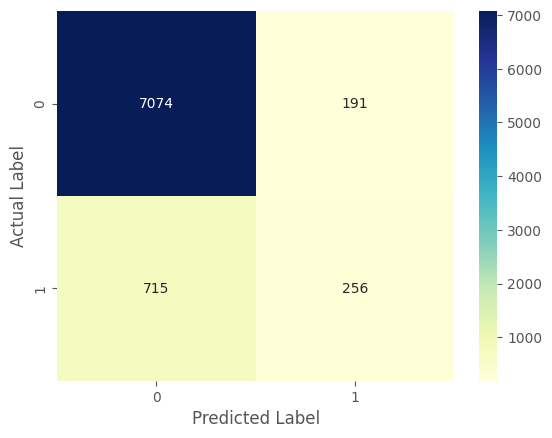

In [55]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['No', 'Yes']
print(classification_report(y_test, y_pred, target_names=labels))

O dataset possui mais pessoas que não subscreveram do que subscreveram. O modelo não está bom porquê está favorecendo (está com bias) essas pessoas da classe com maior frequência. O recall para a classe minoria está muito baixo. Na segunda linha, notamos que todas as entradas da classe 1 foram erroneamente previstas como classe 0.

**Random Forest**

In [56]:
model2 = RandomForestClassifier()

model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

# Performance no teste
auc2 = roc_auc_score(y_train, model2.predict(X_train))
print("Performance X_train : ", auc2)

# Performance no teste
auc2 = roc_auc_score(y_test, model2.predict(X_test))
print("Performance X_test : ", auc2)

Performance X_train :  0.9818005631682145
Performance X_test :  0.6245765889388267


Parece que o modelo Random Forest está com overfitting. Os dados de treino foram muito bem mas os de teste muito mal.

              precision    recall  f1-score   support

          No       0.91      0.97      0.94      7265
         Yes       0.55      0.28      0.37       971

    accuracy                           0.89      8236
   macro avg       0.73      0.62      0.65      8236
weighted avg       0.87      0.89      0.87      8236



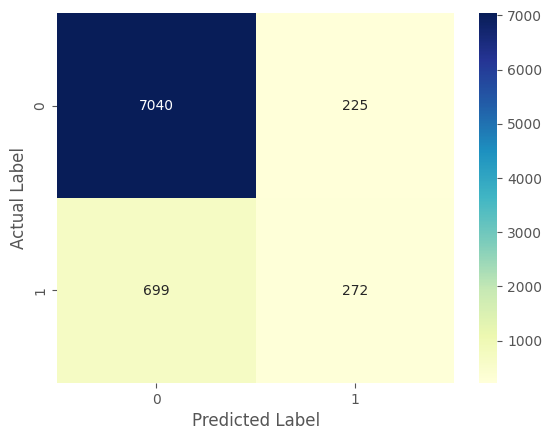

In [57]:
conf_mat2 = confusion_matrix(y_true=y_test, y_pred=y_pred2)
sns.heatmap(pd.DataFrame(conf_mat2), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['No', 'Yes']
print(classification_report(y_test, y_pred2, target_names=labels))

### Resampling
É uma técnica amplamente adotada para lidar com conjuntos de dados altamente desbalanceados é chamada de reamostragem. Consiste em retirar amostras da classe majoritária (subamostragem) e/ou adicionar mais exemplos da classe minoritária (sobreamostragem).

Apesar da vantagem de equilibrar aulas, essas técnicas também têm seus pontos fracos. A implementação mais simples da sobreamostragem é duplicar registros aleatórios da classe minoritária, o que pode causar sobreajuste. Na subamostragem, a técnica mais simples envolve a remoção de registros aleatórios da classe majoritária, o que pode causar perda de informações.

### Balanceando dados com Random Oversampling

In [67]:
#Random Oversampling
random_os = RandomOverSampler(random_state = 42)
X_random, y_random = random_os.fit_resample(X_train, y_train)

In [68]:
# define model
model_xbg_random = XGBClassifier()

model_xbg_random.fit(X_random, y_random)
y_pred_random = model.predict(X_test)

# Performance no teste
auc_random = roc_auc_score(y_random, model_xbg_random.predict(X_random))
print("Performance X_train : ", auc_random)

# Performance no teste
auc_random = roc_auc_score(y_test, model_xbg_random.predict(X_test))
print("Performance X_test : ", auc_random)

Performance X_train :  0.8486608362940694
Performance X_test :  0.716357718644546


### XGBoost + scale_pos_weight (Lidando com classe desbalanceada)
Ajustando hiperparâmetros

Podemos 'pesar' a loss function para o modelo dar mais 'importância' para a classe minoritária. Durante o treino o modelo vai ser mais penalizado em falsos negativos do que em falsos positivos, ou vice-versa.
Random forest e XGBoost funciona melhor com dados desbalanceados do que Regressão Logística, por exemplo.

Embora o algoritmo XGBoost tenha um bom desempenho para uma ampla gama de problemas desafiadores, ele oferece um grande número de hiperparâmetros, muitos dos quais requerem ajuste para obter o máximo do algoritmo em um determinado conjunto de dados.

A implementação fornece um hiperparâmetro projetado para ajustar o comportamento do algoritmo para problemas de classificação desequilibrados; este é o hiperparâmetro scale_pos_weight.

In [88]:
# para hiperparâmetro scale_pos_weight, decidir não usar pois já foi feito random oversampling
#positive_records = y_random.sum()
#negative_records = len(y_random) - positive_records
#spw = negative_records / positive_records

In [95]:
model_hiper = XGBClassifier(booster='gbtree',
                      objective='binary:logistic',
  			              random_state=101,
  			              n_jobs= -1,
										  learning_rate=0.1,
											max_depth=6,
)
model_hiper.fit(X_random, y_random)
model_pred = model_hiper.predict(X_test)

In [96]:
auc_hiper = roc_auc_score(y_random, model_hiper.predict(X_random))
print("Performance X_train : ", auc_hiper)


auc_hiper = roc_auc_score(y_test, model_hiper.predict(X_test))
print("Performance X_test : ", auc_hiper)

Performance X_train :  0.780165345722875
Performance X_test :  0.7389484308540234


              precision    recall  f1-score   support

          No       0.94      0.87      0.91      7265
         Yes       0.39      0.60      0.47       971

    accuracy                           0.84      8236
   macro avg       0.67      0.74      0.69      8236
weighted avg       0.88      0.84      0.86      8236



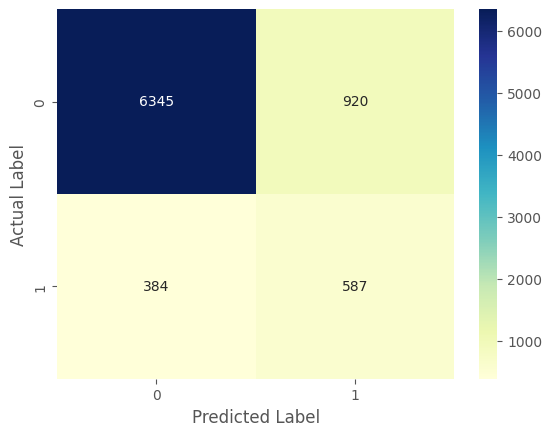

In [97]:
conf_mat_hiper = confusion_matrix(y_true=y_test, y_pred=model_pred)
sns.heatmap(pd.DataFrame(conf_mat_hiper), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['No', 'Yes']
print(classification_report(y_test, model_pred, target_names=labels))

Text(0.5, 1.0, 'Precision Recall Curve')

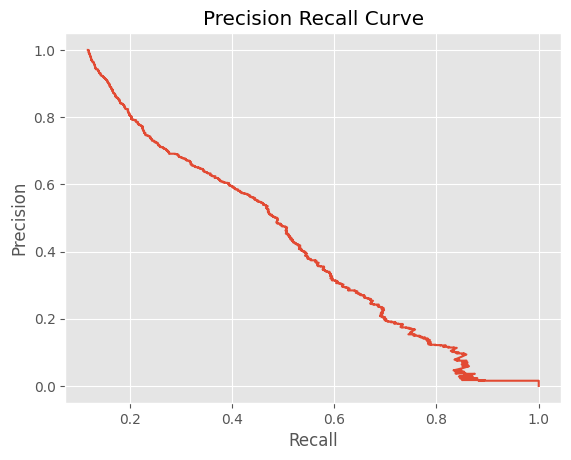

In [94]:
y_pred_hiper = model_hiper.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_hiper)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

Após o hiperparâmetro scale_pos_weight o recall e o f1-score para a classe 'yes' (minoritária) e max_depth melhorou.